# Color Threshold, Green Screen

## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read and display the image

In [3]:
# Read Input image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


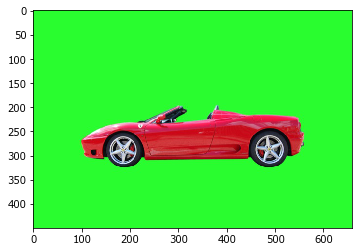

In [4]:
# Display the image
plt.imshow(image)

### Define the color threshold

In [5]:
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])

### Create a mask

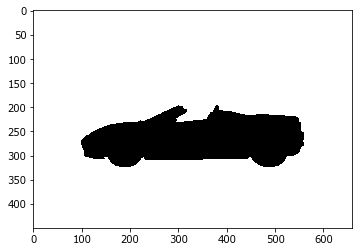

In [6]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

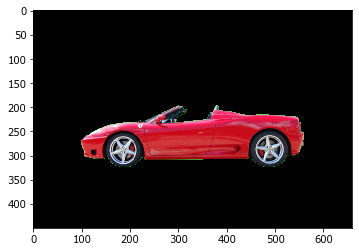

In [7]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display image
plt.imshow(masked_image)

### Mask and add a background image

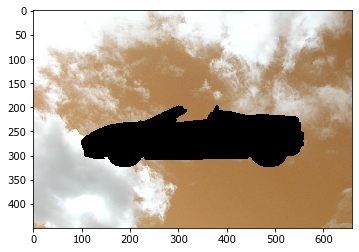

In [8]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it or resize the background to be the right size (450x660)
crop_bg = background_image[0:450, 0:660]

# Mask the cropped background so that the car area is blocked
# Mask the opposite area of the previous image
crop_bg[mask == 0] = [0, 0, 0]

#Display the background
plt.imshow(crop_bg)

### Create a complete image

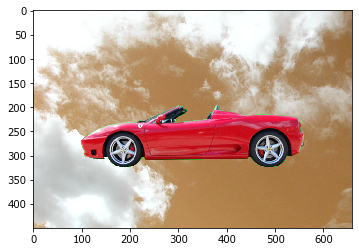

In [9]:
# Add the two images together to create a complete image!
out = masked_image + crop_bg

# Display Output
plt.imshow(out)
